IoT CEID, UPatras - Jupyter Notebook

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from keras.models import Sequential
from keras.layers import Dense, LSTM, SimpleRNN


Data Processing

In [27]:
# Load the CSV file - 2 available datasets: sensor_data.csv(both sensors) , sensor246_data.csv(only sensor246)
df = pd.read_csv('C:/Users/stath/Desktop/iotdb.sensor246_data.csv')
#df = pd.read_csv('C:/Users/stath/Desktop/iotdb.sensor_data.csv')

# Convert 'timestamp' column to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Select the 'timestamp' column and the sensor data column of interest (e.g., temperature)
temperature_df = df[['timestamp', 'Temp']]

# Set the 'timestamp' column as the index
temperature_df.set_index('timestamp', inplace=True)

# Resample the data to hourly intervals and compute the mean
temperature_df_hourly = temperature_df.resample('H').mean()

# Handle NaN values by forward filling
temperature_df_hourly = temperature_df_hourly.fillna(method='ffill')

# Extract the sensor data as a list for ARIMA/SARIMAX
temperature = temperature_df_hourly['Temp'].tolist()


C:\Users\stath\AppData\Local\Temp\ipykernel_25640\2858529433.py:18: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  temperature_df_hourly = temperature_df_hourly.fillna(method='ffill')


Split the dataset

In [28]:
# Define train and test sizes
train_size = int(len(temperature) * 0.7)
train, test = temperature[:train_size], temperature[train_size:]

# Ensure there are no NaN values in the train and test sets
train = [x for x in train if pd.notna(x)]
test = [x for x in test if pd.notna(x)]

Train ARIMA Model

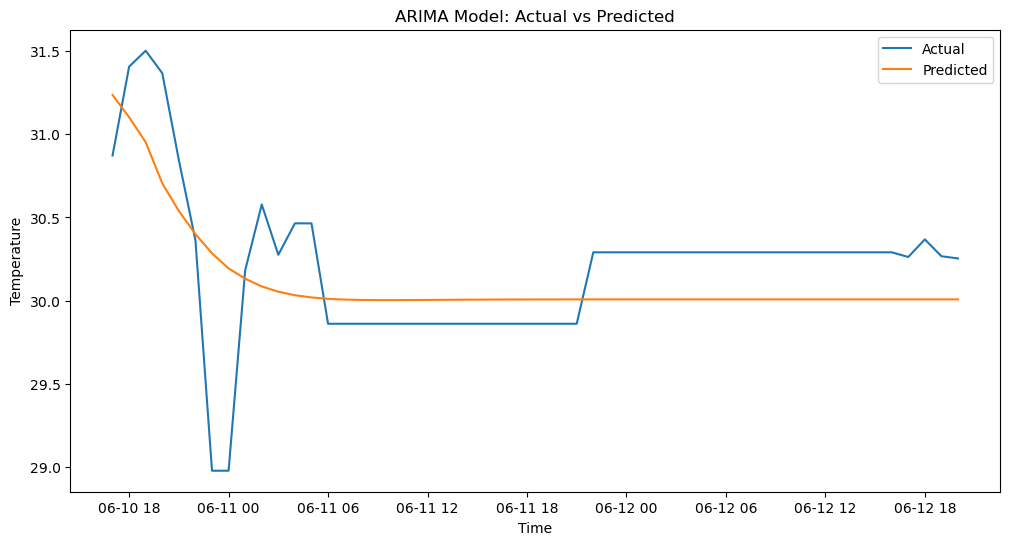

ARIMA Model
MAE: 0.2919606767197438
MSE: 0.13627398790043171
MAPE: 0.00968359636146492


In [34]:
# Fit ARIMA model

# order=(p,d,q): These are the parameters for the ARIMA model
# p: Number of lag observations included in the model (AR part).
# d: Number of times that the raw observations are differenced (determines stationarity).
# q: Size of the moving average window (MA part).

model_arima = ARIMA(train, order=(5,0,1))
model_fit_arima = model_arima.fit()

# Forecast
forecast_arima = model_fit_arima.forecast(steps=len(test))

# Plot Actual vs Predicted
plt.figure(figsize=(12, 6))
plt.plot(temperature_df_hourly.index[train_size:], test, label='Actual')
plt.plot(temperature_df_hourly.index[train_size:], forecast_arima, label='Predicted')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('ARIMA Model: Actual vs Predicted')
plt.show()

# Calculate metrics
mae_arima = mean_absolute_error(test, forecast_arima)
mse_arima = mean_squared_error(test, forecast_arima)
mape_arima = mean_absolute_percentage_error(test, forecast_arima)

print(f'ARIMA Model')
print(f'MAE: {mae_arima}')
print(f'MSE: {mse_arima}')
print(f'MAPE: {mape_arima}')

Train SARIMAX Model

c:\Users\stath\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\stath\AppData\Local\Temp\ipykernel_25640\1896262458.py:20: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  forecast_sarimax = pd.Series(forecast_sarimax).fillna(method='ffill').tolist()


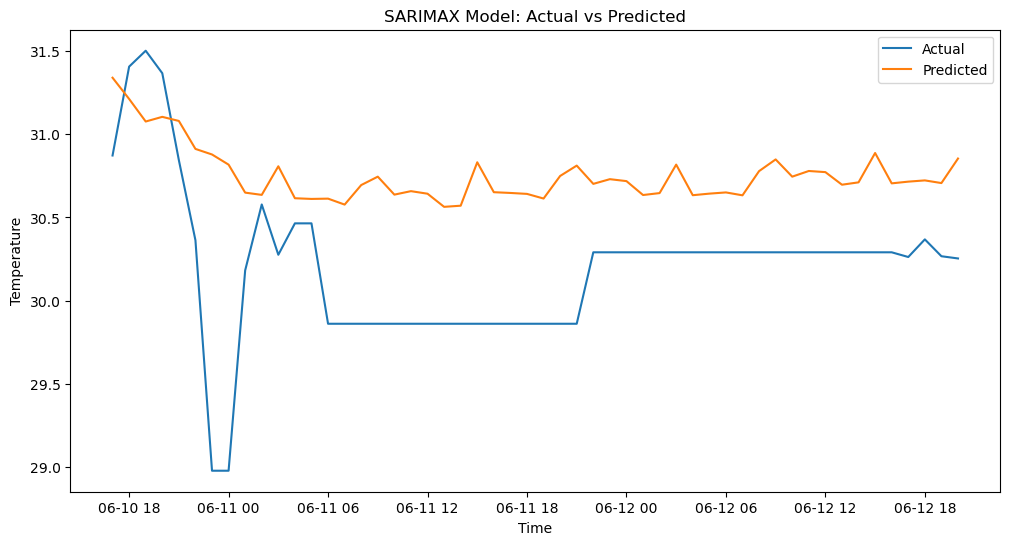

Sarimax Model
MAE: 0.5792695040012383
MSE: 0.44884373342810674
MAPE: 0.019318928617146777


In [37]:
# Fit SARIMAX model

# These are the parameters for the SARIMAX model:
# order=(p,d,q):  Same as in ARIMA.
# p: Number of lag observations included in the model (AR part).
# d: Number of times that the raw observations are differenced (determines stationarity).
# q: Size of the moving average window (MA part).

# seasonal_order=(P,D,Q,s): Parameters for the seasonal component.
# P, D, Q: Similar to p, d, q but for the seasonal component.
# s: Seasonal periodicity (e.g., 12 for monthly data).

model_sarimax = SARIMAX(train, order=(2,1,1), seasonal_order=(2,1,1,12))
model_fit_sarimax = model_sarimax.fit()

# Forecast
forecast_sarimax = model_fit_sarimax.forecast(steps=len(test))

# Ensure there are no NaN values in the forecast using forward fill
forecast_sarimax = pd.Series(forecast_sarimax).fillna(method='ffill').tolist()

# Plot Actual vs Predicted
plt.figure(figsize=(12, 6))
plt.plot(temperature_df_hourly.index[train_size:train_size+len(test)], test, label='Actual')
plt.plot(temperature_df_hourly.index[train_size:train_size+len(test)], forecast_sarimax, label='Predicted')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('SARIMAX Model: Actual vs Predicted')
plt.show()

# Calculate metrics
mae_sarimax = mean_absolute_error(test, forecast_sarimax)
mse_sarimax = mean_squared_error(test, forecast_sarimax)
mape_sarimax = mean_absolute_percentage_error(test, forecast_sarimax)

print(f'Sarimax Model')
print(f'MAE: {mae_sarimax}')
print(f'MSE: {mse_sarimax}')
print(f'MAPE: {mape_sarimax}')

Train LSTM Model

Epoch 1/10


C:\Users\stath\AppData\Local\Temp\ipykernel_25640\3900916870.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y.append(temperature_normalized[i])
c:\Users\stath\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 1.4961
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.5077 
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.3708 
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.3180 
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.1135 
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.1252 
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.0056 
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.0009 
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.1676 
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.9525 
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 444ms/step


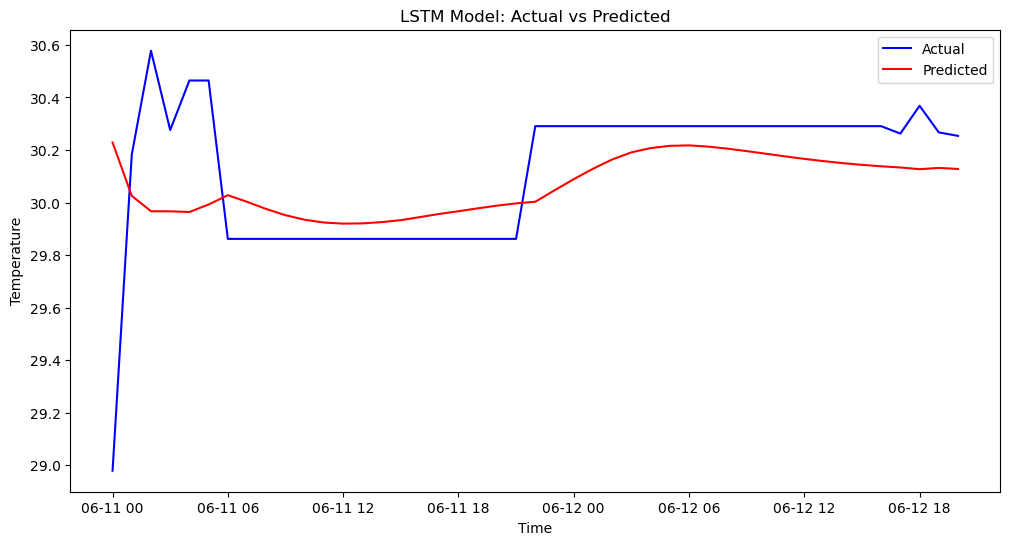

LSTM Model
MAE: 0.3757937136015921
MSE: 0.3164955676908308
MAPE: 0.6302564542591078


In [39]:
# Parameters:
# look_back: Number of time steps to look back in the past for each prediction.
# LSTM(units): Number of LSTM units (neurons) in the layer.
# epochs: Number of epochs (iterations) to train the model.
# batch_size: Number of samples per gradient update during training.

# Normalize the data
temperature = temperature_df_hourly['Temp']
mean = temperature.mean()
std = temperature.std()
temperature_normalized = (temperature - mean) / std

# Create sequences
look_back = 24
X, y = [], []
for i in range(look_back, len(temperature_normalized)):
    X.append(temperature_normalized[i-look_back:i])
    y.append(temperature_normalized[i])
X, y = np.array(X), np.array(y)

# Split into training and testing sets
train_size = int(len(X) * 0.7)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

# Reshape input for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Define and compile the LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(50, input_shape=(look_back, 1)))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
model_lstm.fit(X_train, y_train, epochs=10, batch_size=32)

# Forecast
forecast_lstm = model_lstm.predict(X_test)

# Inverse transform to get actual temperature values
forecast_lstm_actual = (forecast_lstm * std) + mean
y_test_actual = (y_test * std) + mean

# Plot Actual vs Predicted
plt.figure(figsize=(12, 6))

# Plot actual values
plt.plot(temperature_df_hourly.index[train_size + look_back:], y_test_actual, label='Actual', color='blue')

# Plot predicted values
plt.plot(temperature_df_hourly.index[train_size + look_back:], forecast_lstm_actual, label='Predicted', color='red')

plt.legend()
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('LSTM Model: Actual vs Predicted')
plt.show()

# Calculate metrics
mae_lstm = mean_absolute_error(y_test, forecast_lstm)
mse_lstm = mean_squared_error(y_test, forecast_lstm)
mape_lstm = mean_absolute_percentage_error(y_test, forecast_lstm)

print(f'LSTM Model')
print(f'MAE: {mae_lstm}')
print(f'MSE: {mse_lstm}')
print(f'MAPE: {mape_lstm}')

Train SimpleRNN Model

Epoch 1/5


c:\Users\stath\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - loss: 1.5098
Epoch 2/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.2925 
Epoch 3/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.1663 
Epoch 4/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.8914 
Epoch 5/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.8092 
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 301ms/step


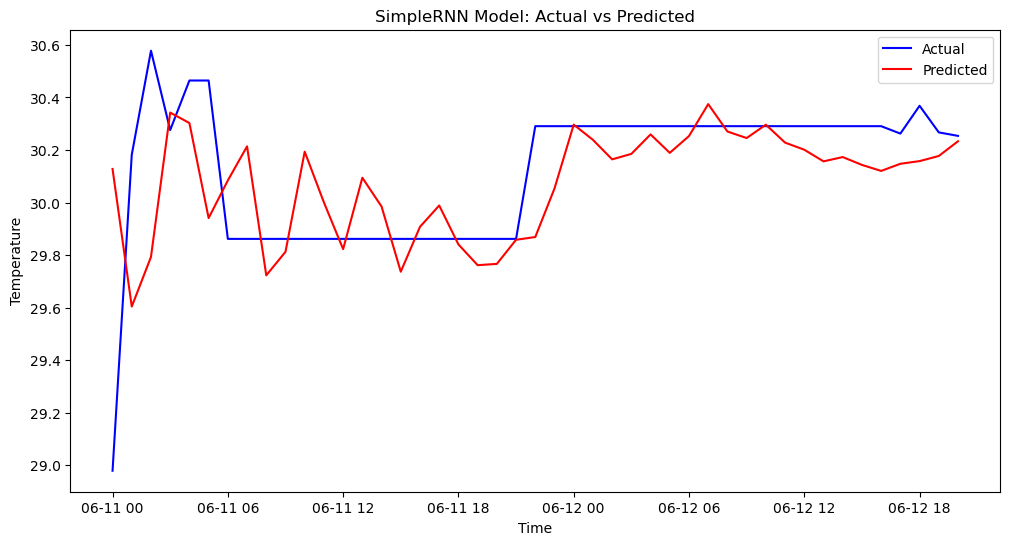

SimpleRNN Model
MAE: 0.3673957564883577
MSE: 0.34277451553072896
MAPE: 0.6700184002027147


In [42]:
# Parameters:
# input_shape=(look_back, 1): Similar to LSTM, shape of input data.
# SimpleRNN(units): Number of SimpleRNN units (neurons) in the layer.
# epochs and batch_size: Similar to LSTM.

# Define and compile the SimpleRNN model
model_rnn = Sequential()
model_rnn.add(SimpleRNN(50, input_shape=(look_back, 1)))
model_rnn.add(Dense(1))
model_rnn.compile(loss='mean_squared_error', optimizer='adam')
model_rnn.fit(X_train, y_train, epochs=5, batch_size=64)

# Forecast
forecast_rnn = model_rnn.predict(X_test)

# Inverse transform to get actual temperature values for RNN
forecast_rnn_actual = (forecast_rnn * std) + mean
y_test_actual_rnn = (y_test * std) + mean

# Plot Actual vs Predicted
plt.figure(figsize=(12, 6))

plt.plot(temperature_df_hourly.index[train_size + look_back:], y_test_actual_rnn, label='Actual', color='blue')

# Plot predicted values for RNN
plt.plot(temperature_df_hourly.index[train_size + look_back:], forecast_rnn_actual, label='Predicted', color='red')

plt.legend()
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('SimpleRNN Model: Actual vs Predicted')
plt.show()

# Calculate metrics
mae_rnn = mean_absolute_error(y_test, forecast_rnn)
mse_rnn = mean_squared_error(y_test, forecast_rnn)
mape_rnn = mean_absolute_percentage_error(y_test, forecast_rnn)

print(f'SimpleRNN Model')
print(f'MAE: {mae_rnn}')
print(f'MSE: {mse_rnn}')
print(f'MAPE: {mape_rnn}')
